In [1]:
from google.colab import drive
drive.mount('/content/drive') # for google colab. adjust accordingly
PARENT_DIR = '/content/drive/MyDrive/CS287-final-project/' # for google colab. adjust accordingly

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read in reference translations
ref = pd.read_pickle(PARENT_DIR + "tatoeba/tatoeba_df_subset.pkl")

# remove punctuation from reference translations
punct = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~—“”'

# save the reference translations as a list
ref_list = []
ref_list_by_sentence = []
for s in ref[1]:
    ref_list += s.strip(punct).lower().split(' ')
    ref_list_by_sentence.append(s.strip(punct).lower().split(' '))

In [ ]:
ref_list_by_sentence[0]

['il',
 'est',
 'difficile',
 'de',
 'lui',
 'faire',
 'faire',
 'quoi',
 'que',
 'ce',
 'soit',
 'sous',
 "l'impulsion",
 'du',
 'moment']

In [4]:
# bin words in reference translations by sentence length
# ref_sentence_lengths = [len(s) for s in ref_list_by_sentence]
# ref_list_by_sentence_sorted = sorted(ref_list_by_sentence, key=len)
# ref_list_by_sentence_sorted = np.split(np.array(ref_list_by_sentence_sorted), 10)
ref_sentence_lengths = [len(s) for s in ref_list_by_sentence]
length_order = np.argsort(np.array(ref_sentence_lengths))

[array([6, 6, 6, 6, 7, 7, 7, 7, 7]),
 array([7, 7]),
 array([], dtype=int64),
 array([7]),
 array([7]),
 array([], dtype=int64),
 array([7]),
 array([7]),
 array([7, 7]),
 array([7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8]),
 array([ 8,  8,  8, ..., 33, 37, 47])]

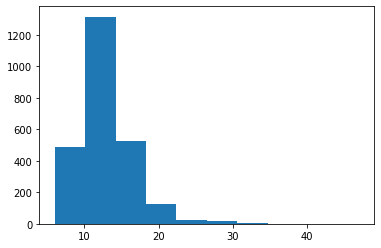

In [5]:
plt.hist(ref_sentence_lengths)
[pd.Series(bin).value_counts() for bin in np.split(np.array(ref_sentence_lengths), 10)]
q = np.quantile(ref_sentence_lengths, np.arange(0.1, 1.1, 0.1)).astype(int)
np.split(np.array(ref_sentence_lengths)[length_order], q)

In [6]:
breaks = [5, 9, 10, 11, 12, 13, 14, 15,16, 17, 47]
num_per_bin = pd.cut(ref_sentence_lengths, breaks).value_counts().cumsum()[:-1]

In [7]:
def length_bias_by_bin(translation_file):
  mbr = open(PARENT_DIR + translation_file, "r")
  content = mbr.read()
  content_list = content.split("\n")
  content_all = ''.join(content_list)
  mbr.close()
  punct = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~—“”'
  s_list = []
  for s in content_list:
      s_list.append(s.strip(punct).lower().split(' '))
  translation_lengths = [len(s) for s in s_list]
  length_diffs = [transl - ref for ref, transl in zip(ref_sentence_lengths, translation_lengths)] #reference - translation
  #print(plt.hist(length_diffs))
  #print(s_list[0])
  #print(np.mean(length_diffs))
  length_diffs_sorted = np.array(length_diffs)[length_order]
  #length_diffs_sorted_by_bin = np.split(length_diffs_sorted, 10)
  length_diffs_sorted_by_bin = np.split(length_diffs_sorted, num_per_bin)
  print([len(bin) for bin in length_diffs_sorted_by_bin])
  return pd.Series([np.mean(bin) for bin in length_diffs_sorted_by_bin]), pd.Series([np.std(bin) for bin in length_diffs_sorted_by_bin])
  #return pd.Series([])


In [8]:
beam = length_bias_by_bin('MBR/baseline_beam_beam5_n1.txt')
beam_mbr = length_bias_by_bin('MBR/samples_ancestral_n200_candidates_beam_beam5_translations.txt')
topp_mbr = length_bias_by_bin('MBR/samples_ancestral_n200_candidates_topp_p90_n400_translations.txt')
topk_mbr = length_bias_by_bin('MBR/samples_ancestral_n200_candidates_topk_k90_n400_translations.txt')
ancestral_mbr = length_bias_by_bin('MBR/samples_ancestral_n200_basic_candidates_ancestral_n1000_translations.txt')
lengths_by_bin = pd.concat((beam[0], beam_mbr[0], topk_mbr[0], topp_mbr[0], ancestral_mbr[0]), axis=1)
errors_by_bin = pd.concat((beam[1], beam_mbr[1], topk_mbr[1], topp_mbr[1], ancestral_mbr[1]), axis=1)
lengths_by_bin.columns=['beam', 'beam_mbr', 'topk_mbr', 'topp_mbr', 'ancestral_mbr']
errors_by_bin.columns=['beam', 'beam_mbr', 'topk_mbr', 'topp_mbr', 'ancestral_mbr']
lengths_by_bin

[250, 240, 348, 361, 312, 293, 232, 141, 100, 223]
[250, 240, 348, 361, 312, 293, 232, 141, 100, 223]
[250, 240, 348, 361, 312, 293, 232, 141, 100, 223]
[250, 240, 348, 361, 312, 293, 232, 141, 100, 223]
[250, 240, 348, 361, 312, 293, 232, 141, 100, 223]


,beam,beam_mbr,topk_mbr,topp_mbr,ancestral_mbr
0,1.084000,1.108000,1.100000,1.068000,1.072000
1,0.558333,0.520833,0.566667,0.466667,0.445833
2,0.402299,0.250000,0.359195,0.284483,0.284483
3,0.072022,0.072022,-0.066482,0.002770,-0.016620
4,-0.169872,-0.144231,-0.131410,-0.125000,-0.131410
5,-0.443686,-0.532423,-0.535836,-0.518771,-0.484642
6,-0.448276,-0.530172,-0.693966,-0.668103,-0.668103
7,-0.836879,-0.801418,-1.042553,-0.929078,-1.127660
8,-1.150000,-1.220000,-1.200000,-1.300000,-1.210000
9,-1.022422,-1.255605,-1.363229,-1.515695,-1.434978


In [10]:
#lengths_by_bin['Reference Sentence Length'].astype("category")

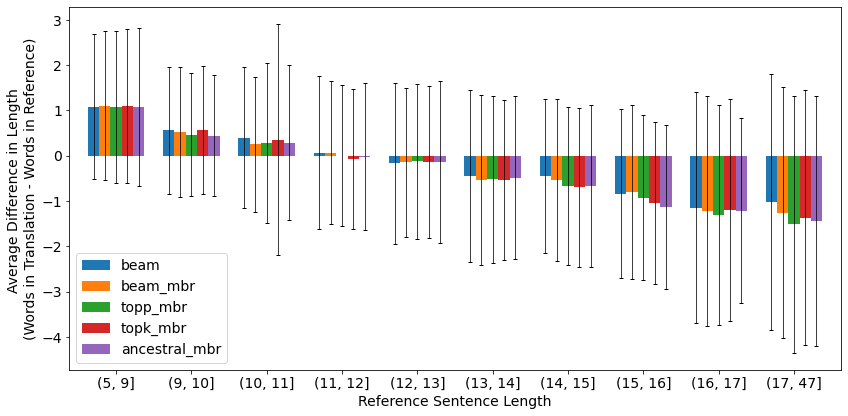

In [123]:
plt.rcParams.update({'font.size': 14})
#lengths_by_bin['Average Reference Sentence Length'] =  [np.mean(bin) for bin in np.split(np.array(ref_sentence_lengths)[length_order], 10)]
lengths_by_bin['Reference Sentence Length'] = pd.cut(ref_sentence_lengths, breaks).value_counts().index.astype('str')
lengths_by_bin.index= lengths_by_bin['Reference Sentence Length']
errors_by_bin.index=lengths_by_bin['Reference Sentence Length']

lengths_by_bin.plot(x = 'Reference Sentence Length', y = ['beam', 'beam_mbr', 'topp_mbr', 'topk_mbr', 'ancestral_mbr'], yerr = errors_by_bin,
                    width =0.75, figsize = (12, 6),
                    kind = 'bar', ylabel = 'Average Difference in Length \n(Words in Translation - Words in Reference)', capsize = 2,
                    error_kw=dict(ecolor='black',elinewidth=0.75))
plt.xticks(rotation=0)
# fig, ax = plt.subplots()
# for y in ['beam', 'beam_mbr', 'topp_mbr', 'topk_mbr', 'ancestral_mbr']:
#   ax.bar('Reference Sentence Length', y, data=lengths_by_bin, alpha=0.5, ecolor='black', capsize=10)
plt.tight_layout()
plt.savefig('lenbias1.png')
plt.show()

In [46]:
# bin words in reference translations by cumulative frequency. Bin 0 has the most frequent words (so fewer word types) and Bin 9 has the least frequent words.
ref_freqs = pd.Series(ref_list).value_counts(normalize = True)
cum_ref_freqs = ref_freqs.cumsum()
cum_ref_freqs_cats = pd.cut(cum_ref_freqs, [i/10 for i in range(11)])
cum_ref_freqs_cats = pd.cut(cum_ref_freqs, [i/4 for i in range(5)])
df = pd.DataFrame({'word':cum_ref_freqs.index, 'Cumulative Frequency':cum_ref_freqs.values, 'Bin': cum_ref_freqs_cats})
bins = [df.loc[lambda df: df['Bin'] == bin, 'word'].tolist() for bin in cum_ref_freqs_cats.values.categories]
bins[0]

['de',
 'la',
 'que',
 'à',
 'je',
 'le',
 'pas',
 'ne',
 'les',
 'vous',
 'un',
 'il',
 'est']

In [48]:
cum_ref_freqs_cats[:20]

de      (0.0, 0.25]
la      (0.0, 0.25]
que     (0.0, 0.25]
à       (0.0, 0.25]
je      (0.0, 0.25]
le      (0.0, 0.25]
pas     (0.0, 0.25]
ne      (0.0, 0.25]
les     (0.0, 0.25]
vous    (0.0, 0.25]
un      (0.0, 0.25]
il      (0.0, 0.25]
est     (0.0, 0.25]
en      (0.25, 0.5]
ce      (0.25, 0.5]
pour    (0.25, 0.5]
a       (0.25, 0.5]
une     (0.25, 0.5]
nous    (0.25, 0.5]
tu      (0.25, 0.5]
dtype: category
Categories (4, interval[float64]): [(0.0, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

In [49]:
# compute frequencies by bin for reference set
bins_combined = [item for bin in bins for item in bin]
ref = pd.Series([ref_freqs[list(map(lambda w : w in bins[i], ref_freqs.index))].sum() for i in range(len(bins))])


In [36]:
# beam_counts = calc_token_freq('MBR/baseline_beam_beam5_n1.txt')
# beam_mbr_counts = calc_token_freq('MBR/samples_ancestral_n200_candidates_beam_beam5_translations.txt')

In [50]:
# compute the frequency of each word type in the translation file by the bins defined in the reference set
def token_freq_by_bin(translation_file):
  mbr = open(PARENT_DIR + translation_file, "r")
  content = mbr.read()
  content_list = content.split("\n")
  content_all = ''.join(content_list)
  mbr.close()
  punct = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~—“”'
  freq_list = []
  for s in content_list:
      freq_list += s.strip(punct).lower().split(' ')
  freqs = pd.Series(freq_list).value_counts(normalize = True)
  return pd.Series([freqs[list(map(lambda w : w in bins[i], freqs.index))].sum() for i in range(len(bins))])

In [51]:
beam = token_freq_by_bin('MBR/baseline_beam_beam5_n1.txt')
beam_mbr = token_freq_by_bin('MBR/samples_ancestral_n200_candidates_beam_beam5_translations.txt')
topp_mbr = token_freq_by_bin('MBR/samples_ancestral_n200_candidates_topp_p90_n400_translations.txt')
topk_mbr = token_freq_by_bin('MBR/samples_ancestral_n200_candidates_topk_k90_n400_translations.txt')
ancestral_mbr = token_freq_by_bin('MBR/samples_ancestral_n200_basic_candidates_ancestral_n1000_translations.txt')
freqs_by_bin = pd.concat((ref, beam, beam_mbr, topk_mbr, topp_mbr, ancestral_mbr), axis=1)
freqs_by_bin.columns=['ref', 'beam', 'beam_mbr','topk_mbr', 'topp_mbr', 'ancestral_mbr']
cum_freqs_by_bin= freqs_by_bin.cumsum()
freqs_by_bin

,ref,beam,beam_mbr,topk_mbr,topp_mbr,ancestral_mbr
0,0.246160,0.265007,0.268369,0.271327,0.271882,0.271515
1,0.252322,0.238213,0.239769,0.240708,0.239925,0.240786
2,0.251502,0.243309,0.240658,0.238649,0.238847,0.238261
3,0.250015,0.187525,0.186433,0.184143,0.184877,0.184469


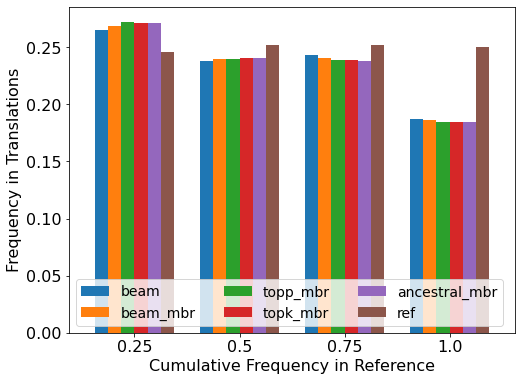

In [122]:
plt.rcParams.update({'font.size': 16})
freqs_by_bin['ref_cum'] = freqs_by_bin['ref'].cumsum().round(2)
freqs_by_bin.plot(x = 'ref_cum', y = ['beam', 'beam_mbr', 'topp_mbr', 'topk_mbr', 'ancestral_mbr', 'ref'], kind = 'bar', 
                  figsize = (8, 6), width =0.75,
                  #xlabel = 'Cumulative Frequency in Reference\n(Most Frequent -> Least Frequent)', ylabel = 'Frequency in Translations')
                  xlabel = 'Cumulative Frequency in Reference', ylabel = 'Frequency in Translations')
plt.xticks(rotation=0)
plt.legend(loc="lower left", ncol=3, fontsize=14) #bbox_to_anchor=(1.0, 1.0),
plt.savefig('tokfreq.png')

In [66]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

In [ ]:
ks = [10,20,30,50,100]
topk_mbr_diffk = [token_freq_by_bin(f'MBR/samples_ancestral_n200_candidates_topk_k{k}_n400_translations.txt') for k in ks]
freqs_by_bin_topk = pd.concat([ref] + topk_mbr_diffk, axis=1)
freqs_by_bin_topk.columns=['ref'] + ks
cum_freqs_by_bin_topk= freqs_by_bin_topk.cumsum()
freqs_by_bin_topk

,10,20,30,50,100,ref
0,0.096598,0.097035,0.096901,0.096361,0.096373,0.093699
1,0.103932,0.104409,0.103530,0.102405,0.103893,0.097280
2,0.118999,0.119865,0.119439,0.119303,0.119580,0.102440
3,0.096259,0.096082,0.097364,0.097379,0.097174,0.102653
4,0.094811,0.094638,0.094774,0.093740,0.094616,0.102410
5,0.095766,0.095867,0.095483,0.095837,0.096588,0.101408
6,0.096814,0.097035,0.097271,0.097286,0.097051,0.099891
7,0.091144,0.091412,0.091383,0.091428,0.090394,0.100194
8,0.077679,0.076878,0.077786,0.077397,0.077419,0.100012
9,0.061472,0.061085,0.060860,0.061486,0.061084,0.100012


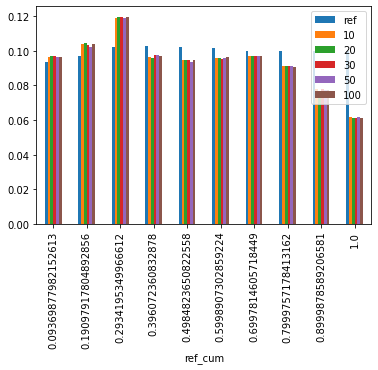

In [ ]:
freqs_by_bin_topk['ref_cum'] = freqs_by_bin_topk['ref'].cumsum()
freqs_by_bin_topk.plot(x = 'ref_cum', y = ['ref'] + ks, kind = 'bar')

In [ ]:
beam_sizes = list(range(1,11))
beam_mbr_diffbeam = [token_freq_by_bin(f'MBR/samples_ancestral_n200_candidates_beam_beam{beam_size}_translations.txt') for beam_size in beam_sizes]
freqs_by_bin_beam_mbr = pd.concat([ref] + beam_mbr_diffbeam, axis=1)
freqs_by_bin_beam_mbr.columns=['ref'] + beam_sizes
cum_freqs_by_bin_beam_mbr= freqs_by_bin_beam_mbr.cumsum()
freqs_by_bin_beam_mbr

,ref,1,2,3,4,5,6,7,8,9,10
0,0.093699,0.094868,0.094603,0.095739,0.095161,0.095117,0.095452,0.095695,0.095867,0.096115,0.095707
1,0.097280,0.104567,0.103506,0.103264,0.103486,0.103332,0.103042,0.103136,0.103373,0.102947,0.103112
2,0.102440,0.119821,0.118468,0.118649,0.119066,0.118628,0.118619,0.119059,0.118662,0.118696,0.118869
3,0.102653,0.097017,0.097724,0.097544,0.097395,0.097508,0.097656,0.097226,0.097521,0.097524,0.097298
4,0.102410,0.091277,0.091513,0.091824,0.093079,0.093554,0.094320,0.093857,0.093569,0.093388,0.093810
5,0.101408,0.097232,0.098489,0.098156,0.097671,0.097998,0.097625,0.097746,0.097613,0.097432,0.097941
6,0.099891,0.097661,0.098305,0.098033,0.098436,0.097263,0.098451,0.097624,0.097736,0.097586,0.097421
7,0.100194,0.091738,0.091207,0.091457,0.091121,0.091316,0.090862,0.091959,0.089984,0.090937,0.091118
8,0.100012,0.077282,0.078877,0.078702,0.079153,0.077982,0.078559,0.077934,0.078464,0.078712,0.078267
9,0.100012,0.060125,0.061773,0.061695,0.061553,0.062533,0.061758,0.061091,0.062349,0.061615,0.061683


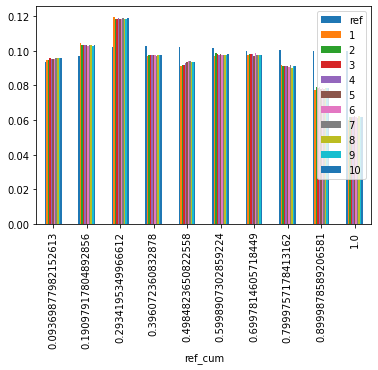

In [ ]:
freqs_by_bin_beam_mbr['ref_cum'] = freqs_by_bin_beam_mbr['ref'].cumsum()
freqs_by_bin_beam_mbr.plot(x = 'ref_cum', y = ['ref'] + beam_sizes, kind = 'bar')

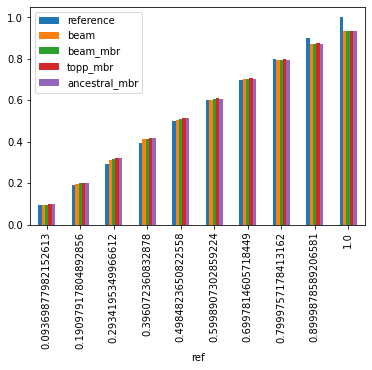

In [ ]:
#ax = df.plot(x = 'ref', y = 'beam', kind = 'scatter', color = 'black', label = 'Reference')
cum_freqs_by_bin['reference'] = cum_freqs_by_bin['ref']
cum_freqs_by_bin.plot(x = 'ref', y = ['ref2', 'beam', 'beam_mbr', 'topp_mbr', 'ancestral_mbr'], kind = 'bar')

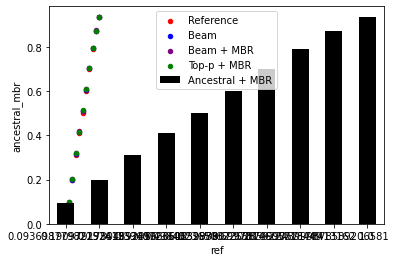

In [ ]:
# ax = df.plot(x = 'ref', y = 'beam', kind = 'scatter', color = 'black', label = 'Reference')
# df.plot(x = 'ref', y = 'beam', kind = 'scatter', color = 'red', ax = ax, label = 'Beam')
# df.plot(x = 'ref', y = 'beam_mbr', kind = 'scatter', color = 'blue', ax = ax, label = 'Beam + MBR')
# df.plot(x = 'ref', y = 'topp_mbr', kind = 'scatter', color = 'purple', ax = ax, label = 'Top-p + MBR')
# df.plot(x = 'ref', y = 'ancestral_mbr', kind = 'scatter', color = 'green', ax = ax, label = 'Ancestral + MBR')

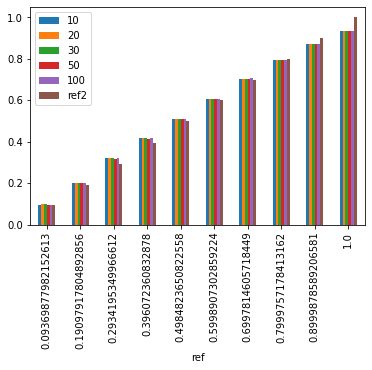

In [ ]:
df['ref2'] = df['ref']
df.plot(x = 'ref', y = ks.append('ref'), kind = 'bar')

In [ ]:
  beam_counts = calc_token_freq('MBR/baseline_beam_beam5_n1.txt')
  df = pd.concat((ref_counts, beam_counts, beam_mbr_counts), axis=1)[:15]
  df.columns=['ref', 'beam', 'beam_mbr']
  df

,ref,beam,beam_mbr
de,0.0456808,1499.0,1545.0
la,0.0245553,822.0,824.0
que,0.0234626,743.0,734.0
à,0.0224003,817.0,762.0
je,0.0209434,668.0,703.0
le,0.0201542,715.0,723.0
pas,0.0187883,642.0,648.0
ne,0.0149942,527.0,535.0
les,0.012566,395.0,391.0
vous,0.0112912,782.0,789.0


In [ ]:
ref_counts

de           1505
la            809
que           773
à             738
je            690
             ... 
individu,       1
ça.             1
base-ball       1
usage           1
tournait        1
Length: 5982, dtype: int64

In [ ]:
print(mbr_list)

['il', 'est', 'difficile', 'de', "l'amener", 'à', 'faire', 'quoi', 'que', 'ce', 'soit', 'en', "l'occurrence", 'je', 'préfère', 'nettoyer', 'ma', 'chambre', 'plutôt', 'que', 'de', 'passer', 'du', 'temps', 'à', 'faire', 'mes', 'devoirs', 'nous', 'avons', 'désespérément', 'besoin', 'de', 'plus', "d'argent", 'pour', 'financer', 'notre', 'projet', 'si', 'vous', 'voulez', 'que', 'je', 'vous', 'aide,', 'il', 'suffit', 'de', 'demander', 'le', 'monde', 'était', 'au', 'bord', 'de', 'la', 'guerre', 'nucléaire', 'lors', 'de', 'la', 'crise', 'des', 'missiles', 'cubains', 'en', 'octobre', '1962', 'le', 'président', 'devrait', 'proposer', 'une', 'nouvelle', 'politique', 'énergétique', "j'ai", 'planté', 'divers', 'arbres', 'fruitiers', 'sur', 'ma', 'propriété', 'il', 'y', 'a', 'trois', 'ans', "j'estime", 'sincèrement', "qu'il", 'est', 'préférable', "d'être", 'un', 'échec', 'dans', 'un', 'domaine', 'que', "j'aime", 'plutôt', 'que', "d'être", 'un', 'succès', 'dans', 'un', 'domaine', 'que', "j'ai", 'déte

In [ ]:
print(ref_list)

['il', 'est', 'difficile', 'de', 'lui', 'faire', 'faire', 'quoi', 'que', 'ce', 'soit', 'sous', "l'impulsion", 'du', 'moment', 'je', 'ferais', 'mieux', 'de', 'nettoyer', 'ma', 'chambre', 'que', 'de', 'passer', 'du', 'temps', 'à', 'faire', 'mes', 'devoirs', 'nous', 'avons', 'désespérément', 'besoin', 'de', 'davantage', "d'argent", 'pour', 'aider', 'à', 'financer', 'notre', 'projet', 'si', 'tu', 'veux', 'que', 'je', 'vous', 'aide,', 'tout', 'ce', 'que', 'tu', 'as', 'à', 'faire', 'est', 'de', 'demander', 'le', 'monde', 'était', 'tout', 'au', 'bord', "d'une", 'guerre', 'nucléaire,', 'lors', 'de', 'la', 'crise', 'des', 'missiles', 'de', 'cuba,', 'en', 'octobre', 'dix-neuf-cent-soixante-deux', 'on', "s'attend", 'à', 'ce', 'que', 'le', 'président', 'propose', 'une', 'nouvelle', 'politique', 'énergétique', "j'ai", 'planté', 'divers', 'arbres', 'fruitiers', 'dans', 'ma', 'propriété', 'il', 'y', 'a', 'trois', 'ans', 'je', 'pense', 'sincèrement', "qu'il", 'est', 'préférable', "d'échouer", 'à', 'qu

In [ ]:
beam = open(PARENT_DIR + "MBR/baseline_beam_beam5_n1.txt", "r")
content = beam.read()
content_list = content.split("\n")
content_all = ''.join(content_list)
beam.close()

In [ ]:
punct = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~—“”'
beam_list = []
for s in content_list:
    beam_list += s.strip(punct).lower().split(' ')

In [ ]:
print(beam_list)

['il', 'est', 'difficile', 'de', "l'amener", 'à', 'faire', 'quoi', 'que', 'ce', 'soit', 'à', "l'improviste", 'je', 'préfère', 'nettoyer', 'ma', 'chambre', 'plutôt', 'que', 'de', 'passer', 'du', 'temps', 'à', 'faire', 'mes', 'devoirs', 'nous', 'avons', 'désespérément', 'besoin', 'de', 'plus', "d'argent", 'pour', 'financer', 'notre', 'projet', 'si', 'vous', 'voulez', 'que', 'je', 'vous', 'aide,', 'tout', 'ce', 'que', 'vous', 'devez', 'faire,', "c'est", 'demander', 'le', 'monde', 'était', 'au', 'bord', 'de', 'la', 'guerre', 'nucléaire', 'durant', 'la', 'crise', 'des', 'missiles', 'cubains', "d'octobre", '1962', 'le', 'président', 'devrait', 'proposer', 'une', 'nouvelle', 'politique', 'énergétique', "j'ai", 'planté', 'plusieurs', 'arbres', 'fruitiers', 'sur', 'ma', 'propriété', 'il', 'y', 'a', 'trois', 'ans', "j'estime", 'sincèrement', "qu'il", 'est', 'préférable', "d'être", 'un', 'échec', 'dans', 'un', 'domaine', 'que', "j'aime", 'plutôt', 'que', "d'être", 'un', 'succès', 'dans', 'un', 'd

In [ ]:
mbr_counts = pd.Series(mbr_list).value_counts()
beam_counts = pd.Series(beam_list).value_counts()

In [ ]:
df = pd.concat((ref_counts, beam_counts, mbr_counts), axis=1)[:15]
df.columns=['ref', 'beam', 'mbr']
df

,ref,beam,mbr
de,1505.0,1499.0,1545.0
la,809.0,822.0,824.0
que,773.0,743.0,734.0
à,738.0,817.0,762.0
je,690.0,668.0,703.0
le,664.0,715.0,723.0
pas,619.0,642.0,648.0
ne,494.0,527.0,535.0
les,414.0,395.0,391.0
vous,372.0,782.0,789.0
